<a href="https://colab.research.google.com/github/irissun9602/DeepLearningProject/blob/master/mnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
2+3

5

In [ ]:
import torch

In [ ]:
x =3.5

y = x*x +2

print (x,y)

3.5 14.25


In [ ]:

print(x)

3.5


In [ ]:
x = torch.tensor(3.5, requires_grad=True)

y = x*x

z= 2 * y +3

print (y)

tensor(12.2500, grad_fn=<MulBackward0>)


In [ ]:
z.backward()

In [ ]:
print(x.grad)


tensor(14.)


In [ ]:
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

x = 2*a + 3*b

y = 5*a*a + 3*b*b*b

z = 2*x + 3*y

z.backward()

In [ ]:
a.grad

tensor(64.)

In [ ]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [ ]:
import pandas

In [ ]:
df = pandas.read_csv('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv', header=None)

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
import matplotlib.pyplot as plt

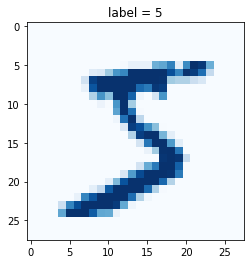

In [ ]:
row = 0
data =df.iloc[row]

label = data[0] # 0번 인덱스에는 결과값이 들어있어서 타이틀로 사용

img = data[1:].values.reshape(28,28)
plt.title("label = " + str(label))
plt.imshow(img, interpolation='none', cmap='Blues')
plt.show()

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class Classifier(nn.Module):

  def __init__(self):
    # 부모 클래스 초기화
    super().__init__()
    self.counter = 0
    self.progress = []

    # 신경망 레이어 정의
    self.model = nn.Sequential(
        nn.Linear(784, 200), # 입력레이어, 완전 연결 매핑
        nn.Sigmoid(),
        nn.Linear(200,10), #은닉 레이어 출력 10개
        nn.Sigmoid() # 10개의 노드 출력에 적용되며 최종 출력
    )

    #손실함수 설정
    #self.loss_function = nn.MSELoss()
    self.loss_function = nn.BCELoss()

    #SGD 옵티마이저 설정
    self.optimiser = torch.optim.SGD(self.parameters(), lr =0.01)

    pass

  def forward(self, inputs):
    #모델 실행
    return self.model(inputs)

  def train(self, inputs, targets):
    #신경망 출력 계산
    outputs = self.forward(inputs)
    #손실 계산
    loss = self.loss_function(outputs, targets)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()


    self.counter +=1
    if(self.counter % 10 == 0):
      self.progress.append(loss.item())
      pass

    if(self.counter % 10000 == 0):
      print("counter = ", self.counter)
      pass

  def plot_progress(self):
      df = pandas.DataFrame(self.progress, columns=['loss'])
      df.plot(ylim=(0, 1.0), figsize=(16,18), alpha=0.1, marker='.',
              grid=True, yticks=(0,0.25,0.5))
      pass



In [ ]:
from torch.utils.data import Dataset

In [ ]:
class MnistDataset(Dataset):

  def __init__(self, csv_file):
    self.data_df = pandas.read_csv(csv_file, header=None)
    pass

  def __len__(self):
    return len(self.data_df)

  def __getitem__(self, index):
    label = self.data_df.iloc[index,0]
    target = torch.zeros((10))
    target[label] = 1.0

    image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values)/255.0
    return label, image_values, target

  def plot_image(self, index):
    img = self.data_df.iloc[index, 1:].values.reshape(28,28)
    plt.title("label = " + str(self.data_df.iloc[index, 0]))
    plt.imshow(img, interpolation='none', cmap='Blues')
    pass

  pass

In [ ]:
mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')

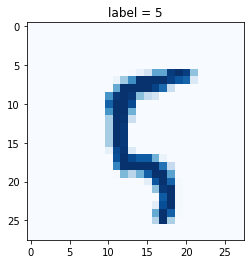

In [ ]:
mnist_dataset.plot_image(100)

In [ ]:
%%time
C = Classifier()
epochs = 3
for i in range(epochs):
  print('training epoch', i+1, "of", epochs)
  for label, image_data_tensor, target_tensor in mnist_test_dataset:
    C.train(image_data_tensor, target_tensor)
    pass
  pass



training epoch 1 of 3
counter =  10000
training epoch 2 of 3
counter =  20000
training epoch 3 of 3
counter =  30000
CPU times: user 22.6 s, sys: 272 ms, total: 22.8 s
Wall time: 22.9 s


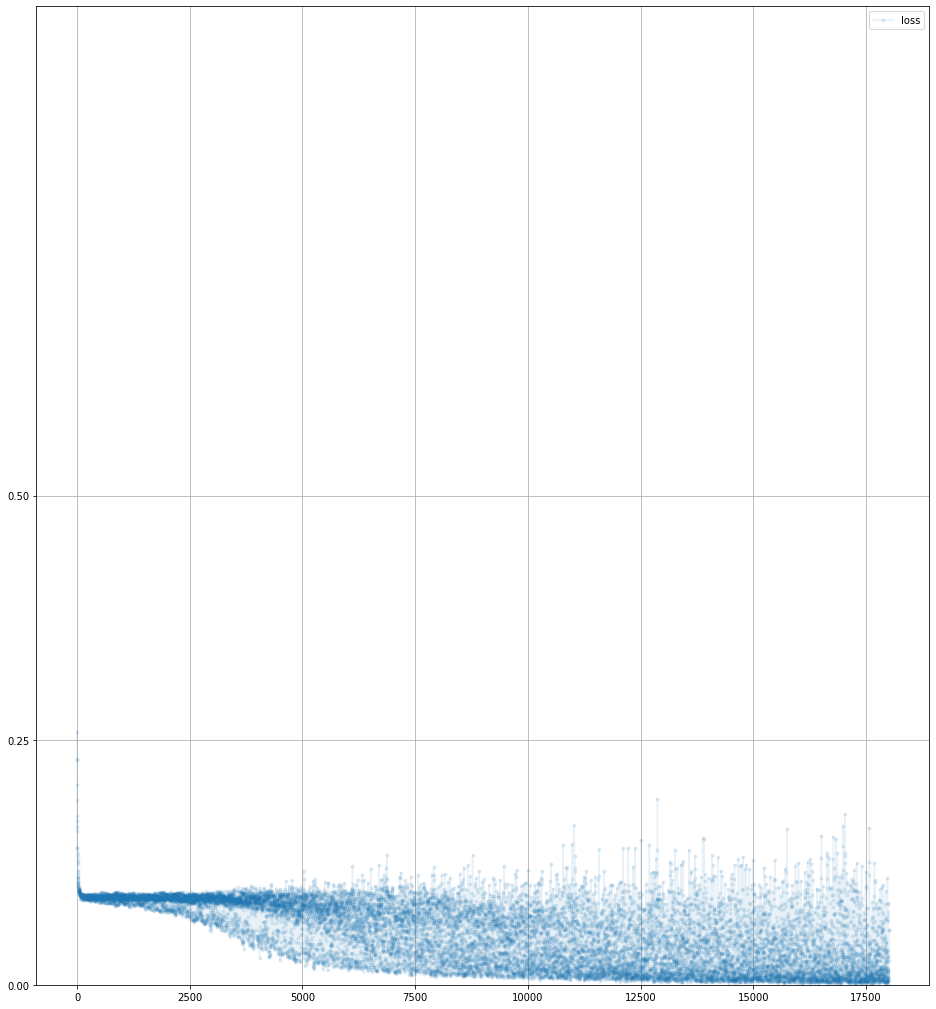

In [ ]:
C.plot_progress()

In [ ]:
mnist_test_dataset = MnistDataset('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_test.csv')

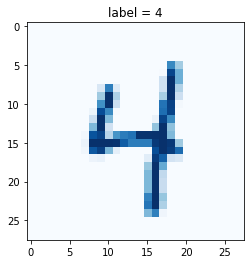

In [ ]:
record = 19

mnist_test_dataset.plot_image(record)

In [ ]:
class Classifier(nn.Module):

  def __init__(self):
    # 부모 클래스 초기화
    super().__init__()
    self.counter = 0
    self.progress = []

    # 신경망 레이어 정의
    self.model = nn.Sequential(
        nn.Linear(784, 200), # 입력레이어, 완전 연결 매핑
        nn.LeakyReLU(0.02),

        nn.LayerNorm(200),

        nn.Linear(200,10), #은닉 레이어 출력 10개
        nn.Sigmoid() # 10개의 노드 출력에 적용되며 최종 출력
    )

    #손실함수 설정
    self.loss_function = nn.MSELoss()

    #SGD 옵티마이저 설정
    self.optimiser = torch.optim.Adam(self.parameters())

    pass

  def forward(self, inputs):
    #모델 실행
    return self.model(inputs)

  def train(self, inputs, targets):
    #신경망 출력 계산
    outputs = self.forward(inputs)
    #손실 계산
    loss = self.loss_function(outputs, targets)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()


    self.counter +=1
    if(self.counter % 10 == 0):
      self.progress.append(loss.item())
      pass

    if(self.counter % 10000 == 0):
      print("counter = ", self.counter)
      pass

  def plot_progress(self):
      df = pandas.DataFrame(self.progress, columns=['loss'])
      df.plot(ylim=(0, 1.0), figsize=(16,18), alpha=0.1, marker='.',
              grid=True, yticks=(0,0.25,0.5))
      pass



In [ ]:
%%time
C = Classifier()
epochs = 3
for i in range(epochs):
  print('training epoch', i+1, "of", epochs)
  for label, image_data_tensor, target_tensor in mnist_test_dataset:
    C.train(image_data_tensor, target_tensor)
    pass
  pass


training epoch 1 of 3
counter =  10000
training epoch 2 of 3
counter =  20000
training epoch 3 of 3
counter =  30000
CPU times: user 50.3 s, sys: 725 ms, total: 51.1 s
Wall time: 51.1 s


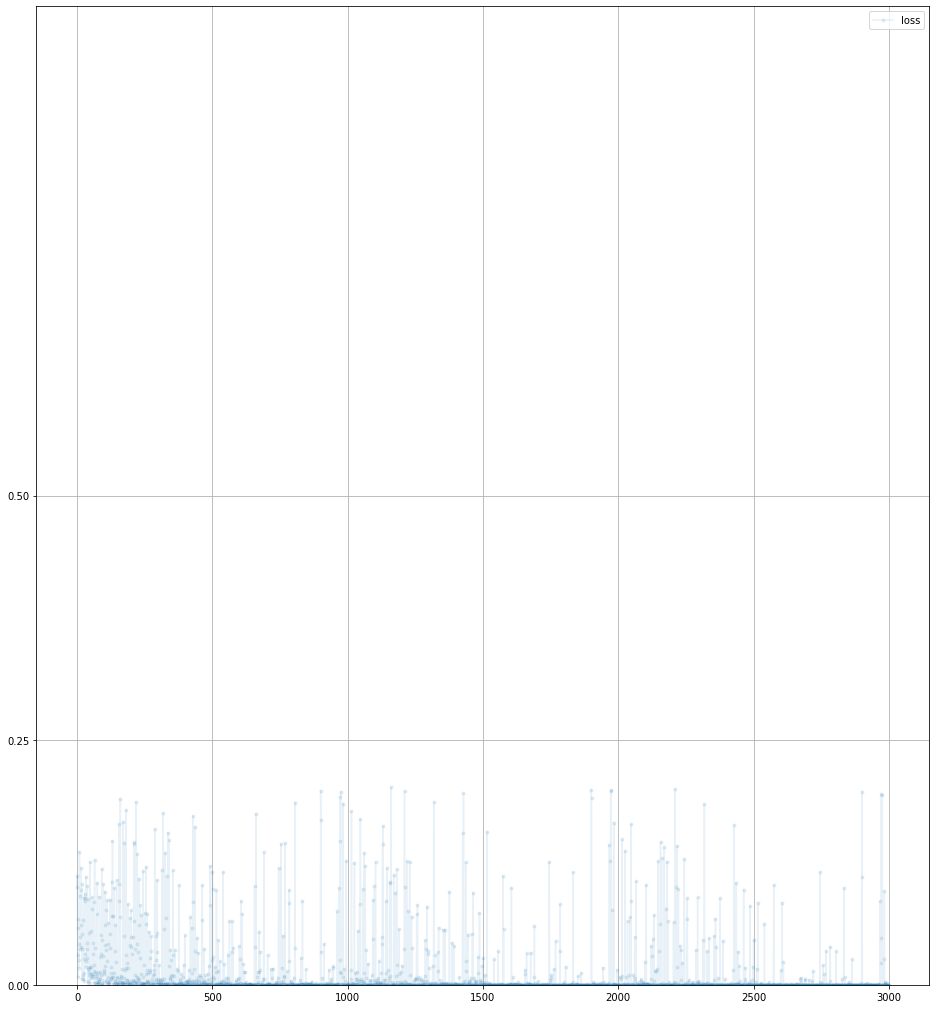

In [ ]:
C.plot_progress()

()

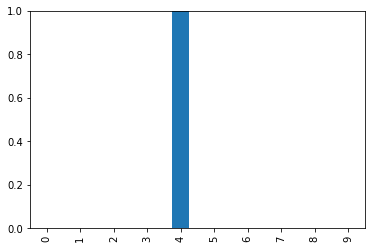

In [ ]:

image_data = mnist_test_dataset[record][1]

output = C.forward(image_data)

pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim = (0,1))
()

In [ ]:
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
      score += 1
      pass
    items += 1

    pass

print(score, items, score/items)

9626 10000 0.9626
